# Regressão por mínimos quadrados em Python

Este material é amplamente baseado no Livro disponível online: https://pythonnumericalmethods.studentorg.berkeley.edu/notebooks/Index.html
Caso for usar, dê crédito ao material original

Lembre-se de que o erro total para \(m\) pontos de dados e \(n\) funções base é dado por:

$$
E = \sum_{i=1}^m e_i^2 = \sum_{i=1}^m (\hat{y}(x_i) - y_i)^2 = \sum_{i=1}^m \left(\sum_{j=1}^n \alpha_j f_j(x_i) - y_i\right)^2.
$$

Esse erro total pode ser visualizado como um paraboloide em um espaço \(n\)-dimensional nos parâmetros \(\alpha_k\). Sabemos, a partir do cálculo diferencial, que o mínimo de um paraboloide ocorre onde todas as derivadas parciais são iguais a zero. Portanto, ao calcular a derivada parcial de \(E\) em relação a \(\alpha_k\) (lembrando que neste caso os parâmetros \(\alpha_k\) são nossas variáveis), igualando o sistema de equações a zero e resolvendo para os \(\alpha_k\), obtemos os valores corretos.

A derivada parcial em relação a \(\alpha_k\) e igualando a zero resulta em:

$$
\frac{\partial E}{\partial \alpha_k} = \sum_{i=1}^m 2\left(\sum_{j=1}^n \alpha_j f_j(x_i) - y_i\right)f_k(x_i) = 0.
$$

Com alguma manipulação, a expressão anterior pode ser reorganizada para:

$$
\sum_{i=1}^m \sum_{j=1}^n \alpha_j f_j(x_i)f_k(x_i) - \sum_{i=1}^m y_i f_k(x_i) = 0,
$$

e, após mais alguns rearranjos, aproveitando o fato de que a adição é comutativa, obtemos:

$$
\sum_{j=1}^n \alpha_j \sum_{i=1}^m f_j(x_i)f_k(x_i) = \sum_{i=1}^m y_i f_k(x_i).
$$

Agora, seja \(X\) um vetor coluna em que o \(i\)-ésimo elemento de \(X\) seja \(x_i\) e \(Y\) seja um vetor coluna construído de forma semelhante, e seja \(F_j(X)\) um vetor coluna em que o \(i\)-ésimo elemento de \(F_j(X)\) seja \(f_j(x_i)\). Usando esta notação, a expressão anterior pode ser reescrita em notação vetorial como:

$$
\left[F_k^T(X)F_1(X), F_k^T(X)F_2(X), \ldots, F_k^T(X)F_j(X), \ldots, F_k^T(X)F_n(X)\right]
\left[\begin{array}{c} \alpha_1 \\
\alpha_2 \\
\cdots \\
\alpha_j \\
\cdots \\
\alpha_n
\end{array}\right] = F_k^T(X)Y.
$$

Se repetirmos essa equação para cada \(k\), obtemos o seguinte sistema de equações lineares na forma matricial:

$$
\left[\begin{array}{cc}
F_1^T(X)F_1(X), F_1^T(X)F_2(X), \ldots, F_1^T(X)F_j(X), \ldots, F_1^T(X)F_n(X)&\\ 
F_2^T(X)F_1(X), F_2^T(X)F_2(X), \ldots, F_2^T(X)F_j(X), \ldots, F_2^T(X)F_n(X)&\\
& \cdots \ \cdots\\
F_n^T(X)F_1(X), F_n^T(X)F_2(X), \ldots, F_n^T(X)F_j(X), \ldots, F_n^T(X)F_n(X)
\end{array}\right]
\left[\begin{array}{c} \alpha_1 \\
\alpha_2 \\
\cdots \\
\alpha_j \\
\cdots \\
\alpha_n
\end{array}\right] =
\left[\begin{array}{c} F_1^T(X)Y \\
F_2^T(X)Y \\
\cdots \\
F_n^T(X)Y
\end{array}\right].
$$

Se definirmos $(A = [F_1(X), F_2(X), \ldots, F_j(X), \ldots, F_n(X)]$ e $\beta$ como um vetor coluna em que o $j$-ésimo elemento de $\beta$ seja $\alpha_j$, então o sistema de equações anterior torna-se:

$$
A^T A \beta = A^T Y,
$$

e ao resolver essa equação matricial para $\beta$, obtemos $\beta = (A^T A)^{-1} A^T Y$, que é exatamente a mesma fórmula derivada anteriormente.

Se formos calcular a estimativa dos dados em cada ponto específico \(x_i\), obtemos o seguinte sistema de equações:


\begin{aligned}
\hat{y}(x_1) &= \alpha_1 f_1(x_1) + \alpha_2 f_2(x_1) + \cdots + \alpha_n f_n(x_1),\\
\hat{y}(x_2) &= \alpha_1 f_1(x_2) + \alpha_2 f_2(x_2) + \cdots + \alpha_n f_n(x_2),\\
&\qquad\qquad\qquad\qquad\cdots\\
\hat{y}(x_m) &= \alpha_1 f_1(x_m) + \alpha_2 f_2(x_m) + \cdots + \alpha_n f_n(x_m).
\end{aligned}

Em um cenário ideal onde os dados não possuem nenhum tipo de ruído ou imperfeição, a função de estimativa deveria passar exatamente por todos os pontos de dados, resultando em:


\begin{aligned}
y_1 &= \alpha_1 f_1(x_1) + \alpha_2 f_2(x_1) + \cdots + \alpha_n f_n(x_1),\\
y_2 &= \alpha_1 f_1(x_2) + \alpha_2 f_2(x_2) + \cdots + \alpha_n f_n(x_2),\\
&\qquad\qquad\qquad\qquad\cdots\\
y_m &= \alpha_1 f_1(x_m) + \alpha_2 f_2(x_m) + \cdots + \alpha_n f_n(x_m).
\end{aligned}


Utilizando a matriz \(A\) conforme definida anteriormente, podemos expressar este sistema na forma matricial:

$$
Y = A\beta.
$$

Entretanto, na prática, os dados quase sempre contêm ruído, o que impede a função de estimativa de coincidir perfeitamente com todos os pontos de dados, resultando em um sistema sem solução exata. Por isso, aplicamos o método de regressão por mínimos quadrados para obter uma solução aproximada:

$$
\beta = (A^T A)^{-1} A^T Y
$$

In [25]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

#plt.style.use('seaborn-poster')

In [247]:
# generate x and y
x = np.linspace(0, 1, 101)
a1 = 1
a2 = 2
y = a1*x + a2 + 0.1*np.random.random(len(x))

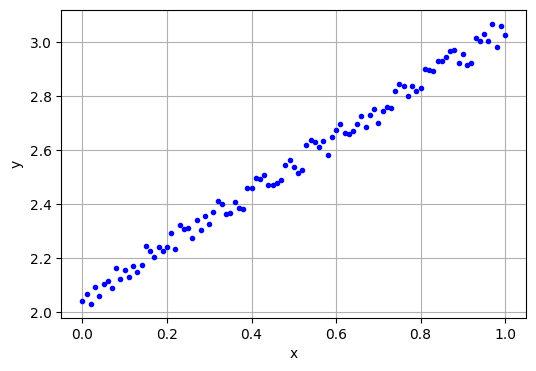

In [255]:
# plot the results
plt.figure(figsize = (6,4))
plt.plot(x, y, 'b.')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

In [249]:
#Function to be adjusted
def func(x, a1):
    y = a1*x
    return y

In [250]:
alpha1_vec = np.linspace(0,5,1000)
res_vec = []
for ii in range(len(alpha1_vec)):
    yfit = func(x,alpha1_vec[ii])
    res = np.sqrt(np.sum((y-yfit)**2))
    res_vec.append(res)

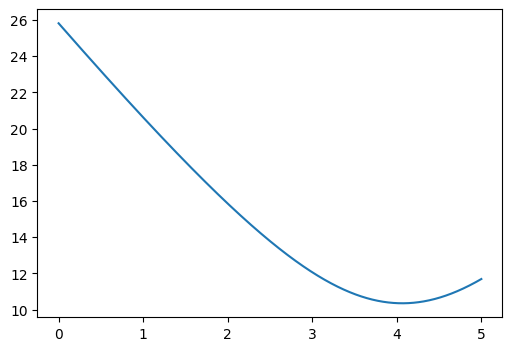

In [256]:
#Graficando o resultado
plt.figure(figsize = (6,4))
plt.plot(alpha1_vec,res_vec)

O valor de `alpha1` (coeficiente angular) que melhor se ajuste corresponde ao mínimo da parábola. Podemos encontrar o mínimo desta parábola com a seguinte função:

In [252]:
imin = np.argmin(res_vec) # posição do mínimo
vmin = np.min(res_vec) # valor do mínimo

print(f"posição do mínimo={imin}")
print(f"valor do mínimo={vmin}")
print(f"valor de alpha1 correspondende ao mínimo={alpha1_vec[imin]}")

posição do mínimo=812
valor do mínimo=10.352468478813742
valor de alpha1 correspondende ao mínimo=4.064064064064064


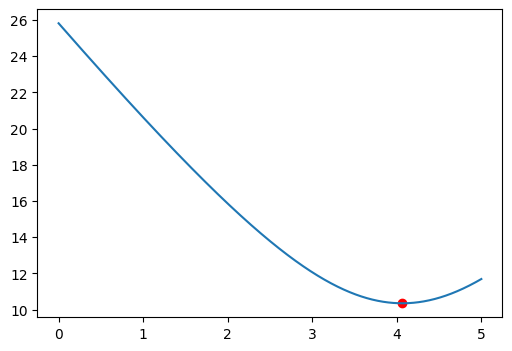

In [257]:
#Plotando o mínimo
plt.figure(figsize = (6,4))
plt.plot(alpha1_vec,res_vec)
plt.scatter(alpha1_vec[imin],res_vec[imin],color="red")

## Existe uma função específica para fazer o fitting automaticamente

This scipy function is actually very powerful, that it can fit not only linear functions, but many different function forms, such as non-linear function. Here we will show the linear example from above. Note that, using this function, we don't need to turn y into a column vector.

In [260]:
chute_inicial = [0] # chute_inicial para os parâmetros
alpha,_ = optimize.curve_fit(func, xdata = x, ydata = y, p0 = chute_inicial)
print(alpha)

[4.0655764]


## Fitting com duas variáveis

$y= a1.x+a2$

In [325]:
# generate x and y
x = np.linspace(0, 1, 101)
a1 = 1
a2 = 2
y = a1*x + a2 + 0.1*np.random.random(len(x))

In [326]:
#Function to be adjusted
def func2(x, a1,a2):
    y = a1*x+a2
    return y

In [327]:
alpha1_vec = np.linspace(-3,3,250)
alpha2_vec = np.linspace(-3,3,250)
res_vec = np.zeros((250, 250))
alpha1_mat, alpha2_mat = np.meshgrid(alpha1_vec, alpha2_vec)

for ii in range(len(alpha1_mat)):
    for jj in range(len(alpha2_mat)):
        yfit = func2(x, alpha1_mat[ii,jj], alpha2_mat[ii,jj]) 
        res = np.sqrt(np.sum((y-yfit)**2))
        res_vec[ii,jj]=res

### Mínimo da superfície

In [328]:
imin,jmin = np.unravel_index(res_vec.argmin(), res_vec.shape) # posição do mínimo
vmin = np.min(res_vec) # valor do mínimo
alpha1min = alpha1_mat[imin,jmin]
alpha2min = alpha2_mat[imin,jmin]
print(f"posição do mínimo={imin},{jmin}")
print(f"valor do mínimo={vmin}")
print(f"valor de alpha1,alpha2 correspondende ao mínimo={alpha1min,alpha2min}")

posição do mínimo=210,165
valor do mínimo=0.2787712930108927
valor de alpha1,alpha2 correspondende ao mínimo=(0.9759036144578315, 2.0602409638554215)


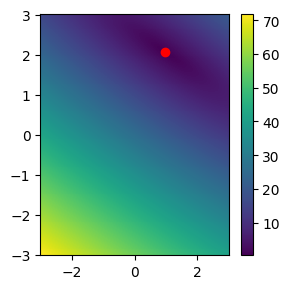

In [329]:
#---
from matplotlib import cm
fig, ax = plt.subplots(1,1,figsize=(3,3))
mesh = ax.pcolormesh(alpha1_mat, alpha2_mat, res_vec, linewidth=0, antialiased=False)
ax.scatter(alpha1min,alpha2min,color='red')
fig.colorbar(mesh)
plt.tight_layout()
plt.show()

In [330]:
chute_inicial = 0,0 # chute_inicial para os parâmetros
alpha,cov = optimize.curve_fit(func2, xdata = x, ydata = y)
print(alpha)

[0.99568545 2.05416626]


Usando a solução analítica: $$
\beta = (A^T A)^{-1} A^T Y
$$

In [331]:
# assemble matrix A
A = np.vstack([x, np.ones(len(x))]).T

# turn y into a column vector
y = y[:, np.newaxis]

In [332]:
# Direct least square regression
alphadirect = np.dot((np.dot(np.linalg.inv(np.dot(A.T,A)),A.T)),y)
print(alphadirect)

[[0.99568545]
 [2.05416626]]


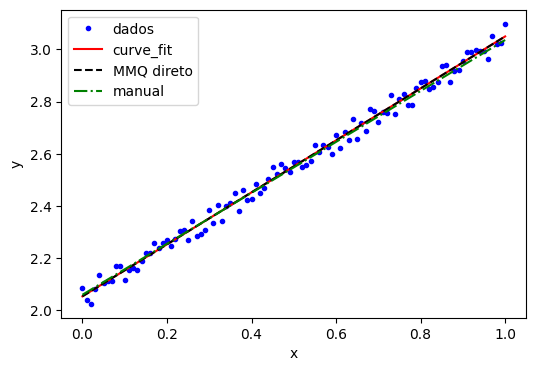

In [333]:
# plot the results
plt.figure(figsize = (6,4))
plt.plot(x, y, 'b.',label='dados')
plt.plot(x, func2(x,alpha[0],alpha[1]), 'r',label='curve_fit')
plt.plot(x, func2(x,alphadirect[0,0],alphadirect[1,0]), '--k',label='MMQ direto')
plt.plot(x, func2(x,alpha1min,alpha2min), '-.g',label='manual')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In Python, there are many different ways to conduct the least square regression. For example, we can use packages as *numpy*, *scipy*, *statsmodels*, *sklearn* and so on to get a least square solution. Here we will use the above example and introduce you more ways to do it. Feel free to choose one you like. 

### Use the pseudoinverse

We talked before that the $(A^T A)^{-1} A^T$ is called the pseudo-inverse, therefore, we could use the *pinv* function in *numpy* to directly calculate it. 

In [335]:
pinv = np.linalg.pinv(A)
alpha = pinv.dot(y)
print(alpha)

[[0.99568545]
 [2.05416626]]


### Use numpy.linalg.lstsq

Actually, *numpy* has already implemented the least square methods that we can just call the function to get a solution. The function will return more things than the solution itself, please check the documentation for details. 

In [336]:
alpha = np.linalg.lstsq(A, y, rcond=None)[0]
print(alpha)

[[0.99568545]
 [2.05416626]]
